In [23]:
import matplotlib.pyplot as plt
import numpy as np
a=0.5
b=0.1
r=0.1

In [21]:
def f(v):
    '''
    Definition of f(v) in the FN model
    '''
    return v*(a-v)*(v-1)


def phase_plotter(I_ext,xrange1,xrange2,ylimit1,ylimit2,startpoints,color,density=2,direction='forward'):
    '''
    Plots the phase plot
    I_ext= external current
    xrange1=left xrange for the phase plot
    xrange2=right xrange for the phase plot
    ylimit1=lower limit for y axis in phase plot
    startpoints= array of startpoints of trajectories if single trajectories are needed
    color= array of colors for single trajectories
    density= density of streams/trajectories needed in phase plot
    direction= direction of trajectory needed ['forward','both','backward']
    '''
    v_values, w_values = np.meshgrid(np.linspace(xrange1, xrange2, 100), np.linspace(xrange1, xrange2, 100))
    v_dot=f(v_values)-w_values+I_ext
    w_dot=b*v_values-r*w_values

    v=np.linspace(xrange1,xrange2,1000)



    #xdot = xvalues - xvalues * yvalues
    #ydot = - yvalues + xvalues * yvalues
    w_1=f(v)+I_ext
    w_2=(b*v)/r
    plt.figure(figsize=(8,6))
    plt.plot(v,w_1,'b',label='v nullcline')
    plt.plot(v,w_2,'r',label='w nullcline')
    plt.ylim(ylimit1,ylimit2)
    plt.title('Phase plot for I_ext=%0.2f'%I_ext)
    plt.xlabel('v')
    plt.ylabel('w')
    plt.legend()
    if len(startpoints)!=0:
        for i in range(len(startpoints)):    
            plt.streamplot(v_values, w_values, v_dot, w_dot,density=2,start_points=[startpoints[i]],color=color[i],integration_direction=direction,arrowsize=2)
    else:
        plt.streamplot(v_values, w_values, v_dot, w_dot,density=density)
    #plt.quiver(v_values, w_values, v_dot, w_dot)
    plt.grid()
    plt.show()
#phase_plotter(0,-0.4,1.2,0.2,startpoints=[[0.4,0],[0.6,0]],color=['orange','magenta'])


def time_plotter(v_initial,w_initial,I_ext,ylim,v_w):
    '''
    Plots the time domain values of voltages
    v_initial=V(0)
    w_initial=W(0)
    I_ext=external current
    ylim=ylimit for y axis in plot
    v_w=True if plot of V(t) needed, False if W(t) needed
    '''
    niter=10000
    v=np.zeros(niter)
    w=np.zeros(niter)
    
    v[0]=v_initial
    w[0]=w_initial
    t=np.linspace(0,100,niter)
    dt=100/niter
    for i in range(niter-1):
        v[i+1]=v[i]+(f(v[i])-w[i]+I_ext)*dt
        w[i+1]=w[i]+(b*v[i]-r*w[i])*dt
    plt.figure(figsize=(8,6))
    if v_w:  
        plt.plot(t,v) # to plot v
        plt.title('V(t) vs t for I_ext=%0.2f and V(0)=%0.1f ,W(0)=%0.1f'%(I_ext,v_initial,w_initial))
        plt.ylabel('V(t)')
    else:
        plt.plot(t,w) # to plot w
        plt.title('W(t) vs t for I_ext=%0.2f and V(0)=%0.1f ,W(0)=%0.1f'%(I_ext,v_initial,w_initial))
        plt.ylabel('W(t)')
    plt.ylim(-ylim,ylim) 
    plt.xlabel('t')
    plt.grid()
    plt.show()
    


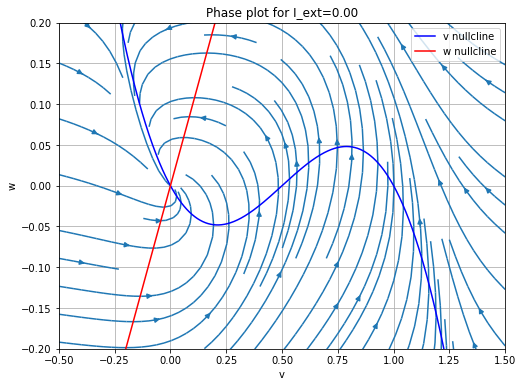

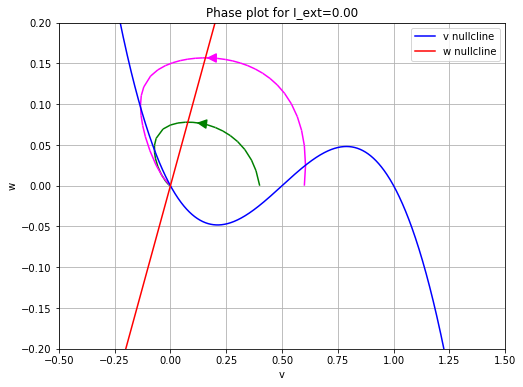

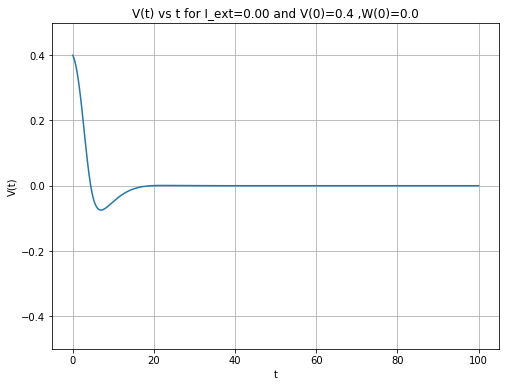

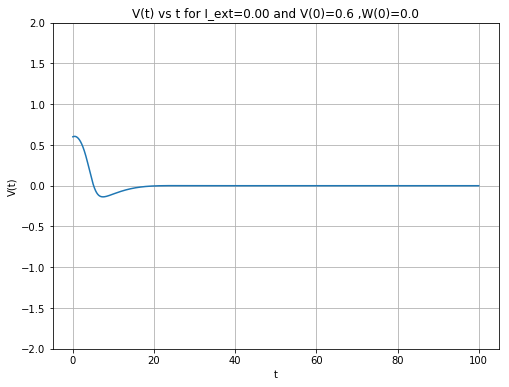

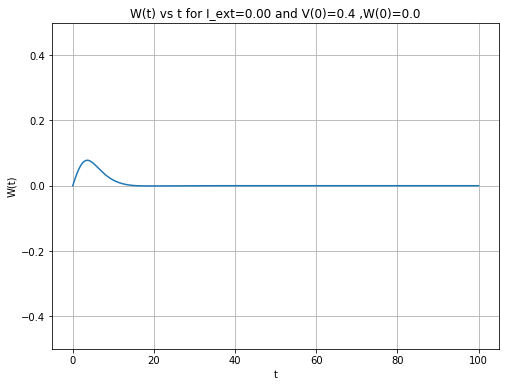

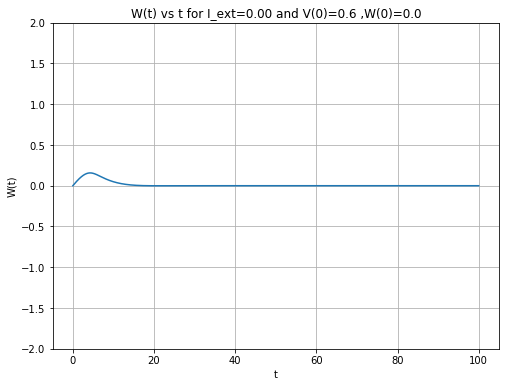

In [22]:
I_ext=0
a=0.5
b=0.1
r=0.1

phase_plotter(I_ext,-0.5,1.5,-0.2,0.2,startpoints=[],color=[])
phase_plotter(I_ext,-0.5,1.5,-0.2,0.2,startpoints=[[0.4,0],[0.6,0]],color=['green','magenta'],direction='forward')
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=0.5,v_w=1)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=0.5,v_w=0)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)

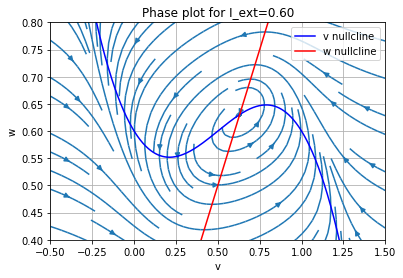

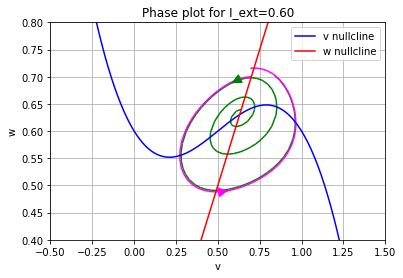

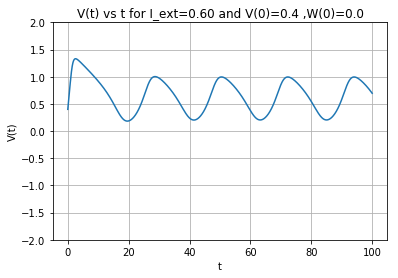

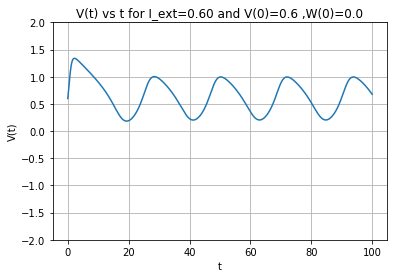

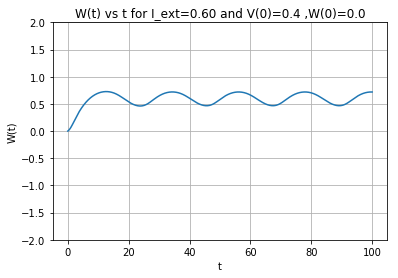

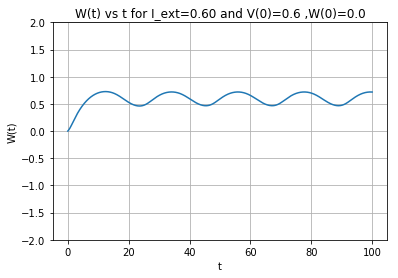

In [4]:
I_ext=0.6
phase_plotter(I_ext,-0.5,1.5,0.4,0.8,startpoints=[],color=[])
phase_plotter(I_ext,-0.5,1.5,0.4,0.8,startpoints=[[0.64,0.64],[0.7,0.7]],color=['green','magenta'],direction='forward')
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)

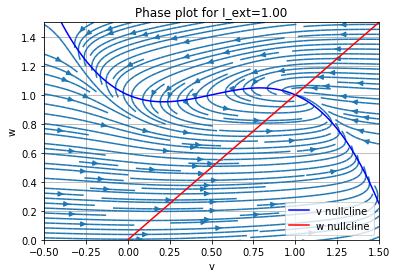

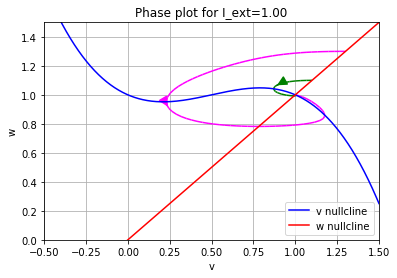

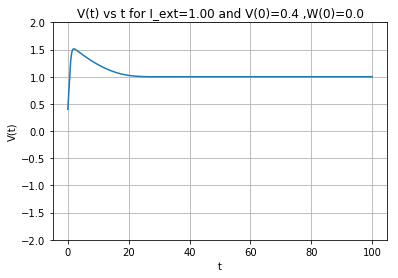

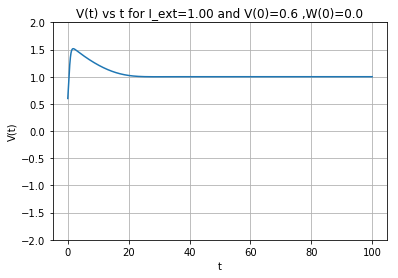

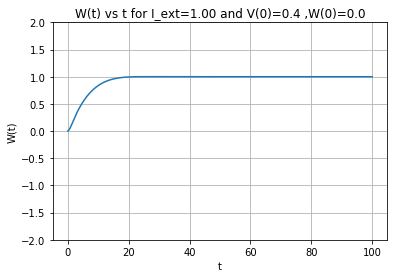

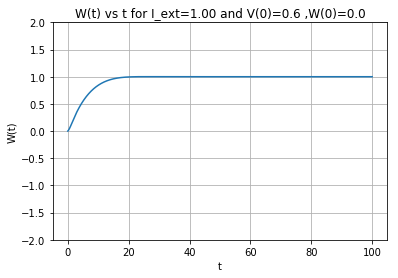

In [5]:
I_ext=1
phase_plotter(I_ext,-0.5,1.5,0,1.5,startpoints=[],color=[])
phase_plotter(I_ext,-0.5,1.5,0,1.5,startpoints=[[1.1,1.1],[1.3,1.3]],color=['green','magenta'],direction='forward')
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)

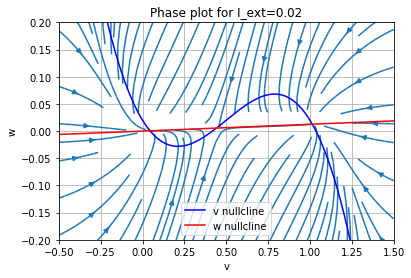

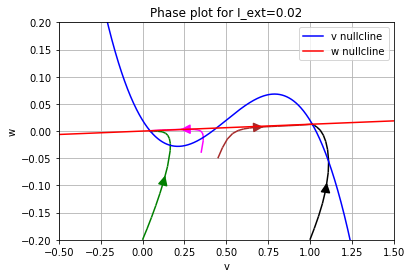

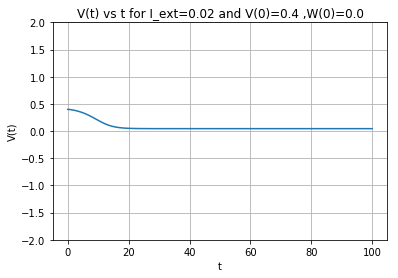

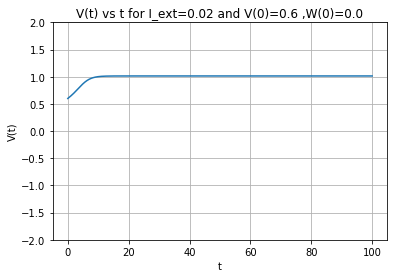

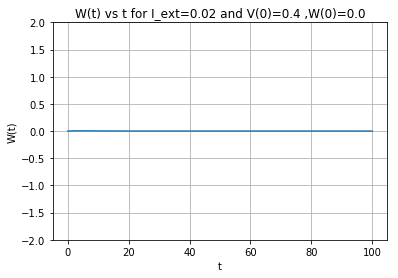

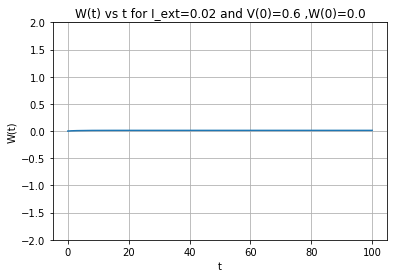

In [6]:
I_ext=0.02
a=0.5; b=0.01; r=0.8;
phase_plotter(I_ext,-0.5,1.5,-0.2,0.2,startpoints=[],color=[])
phase_plotter(I_ext,-0.5,1.5,-0.2,0.2,startpoints=[[0,-0.2],[0.35,-0.04],[0.45,-0.05],[1,-0.2]],color=['green','magenta','brown','black'],direction='forward')
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=1)
time_plotter(v_initial=0.4,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)
time_plotter(v_initial=0.6,w_initial=0,I_ext=I_ext,ylim=2,v_w=0)